In [1]:
import pandas as pd
import requests
import os
from datetime import datetime
from data_creation import download_ecallisto_files, LOCAL_DATA_FOLDER
from glob import glob
from radiospectra.sources import CallistoSpectrogram
from spectogram_utils import spec_to_pd_dataframe, plot_spectogram, masked_spectogram_to_array
from database_utils import extract_instrument_name, glob_files, extract_constant_meta_data, extract_separate_instruments, create_dict_of_instrument_paths

In [4]:
download_ecallisto_files(instrument="all", dir = LOCAL_DATA_FOLDER)

In [5]:
paths = glob_files(LOCAL_DATA_FOLDER, '**', '*', 'fit.gz')

In [6]:
dict_paths = create_dict_of_instrument_paths(paths)

In [7]:
test = CallistoSpectrogram.read(dict_paths['alaska-anchorage_01'][2])

In [8]:
spec = masked_spectogram_to_array(test)

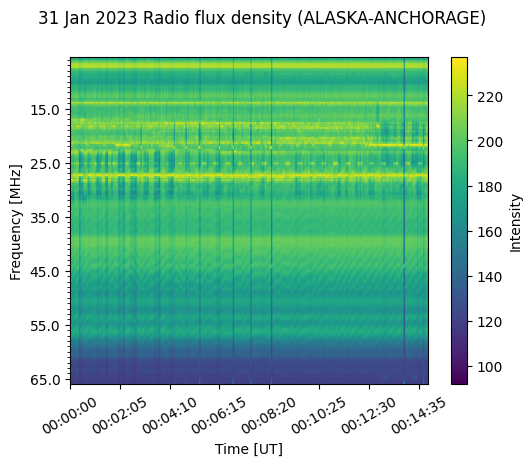

<AxesSubplot: xlabel='Time [UT]', ylabel='Frequency [MHz]'>

In [9]:
spec.peek()

In [70]:
download_ecallisto_files(instrument="all", dir = LOCAL_DATA_FOLDER)
paths = glob_files(LOCAL_DATA_FOLDER, '**', '*', 'fit.gz')
dict_paths = create_dict_of_instrument_paths(paths)

In [ ]:
def add_paths_to_database(paths, db_name):
    """Add paths to database.
    Parameters
    ----------
    paths : dict
        Dictionary of paths to instruments.
    db_name : str
        Name of database.
    """
    for instrument in paths:
        for path in paths[instrument]:
            spec = CallistoSpectrogram.read(path)
            spec.to_sqlite(db_name, instrument, if_exists='append')

In [71]:
print(dict_paths)

{'india-ooty_02': ['/var/lib/ecallisto/2023/01/31/INDIA-OOTY_20230131_071500_02.fit.gz', '/var/lib/ecallisto/2023/01/31/INDIA-OOTY_20230131_091500_02.fit.gz', '/var/lib/ecallisto/2023/01/31/INDIA-OOTY_20230131_054459_02.fit.gz', '/var/lib/ecallisto/2023/01/31/INDIA-OOTY_20230131_043000_02.fit.gz', '/var/lib/ecallisto/2023/01/31/INDIA-OOTY_20230131_014500_02.fit.gz', '/var/lib/ecallisto/2023/01/31/INDIA-OOTY_20230131_033000_02.fit.gz', '/var/lib/ecallisto/2023/01/31/INDIA-OOTY_20230131_114459_02.fit.gz', '/var/lib/ecallisto/2023/01/31/INDIA-OOTY_20230131_101459_02.fit.gz', '/var/lib/ecallisto/2023/01/31/INDIA-OOTY_20230131_122959_02.fit.gz', '/var/lib/ecallisto/2023/01/31/INDIA-OOTY_20230131_104459_02.fit.gz', '/var/lib/ecallisto/2023/01/31/INDIA-OOTY_20230131_074500_02.fit.gz', '/var/lib/ecallisto/2023/01/31/INDIA-OOTY_20230131_105959_02.fit.gz', '/var/lib/ecallisto/2023/01/31/INDIA-OOTY_20230131_024500_02.fit.gz', '/var/lib/ecallisto/2023/01/31/INDIA-OOTY_20230131_034500_02.fit.gz', '